In [1]:
# Import packages
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data sets
rb_DF = pd.read_csv(os.getcwd() + "/processed-data/rb-breakout-data.csv")
wr_DF = pd.read_csv(os.getcwd() + "/processed-data/wr-breakout-data.csv")

In [3]:
# Select feature set
rb_DF = rb_DF[['Age','ADP','TeamPosRank','PosRank1_ADP','PosAmbiguity','TopQB_ADP','Breakout']]
wr_DF = wr_DF[['Age','ADP','TeamPosRank','PosRank1_ADP','PosAmbiguity','TopQB_ADP','Breakout']]

# Functions

In [4]:
def targetBalance(df):
    
    # Number of observations per target group
    print(f"Total Observations: {len(df)}")
    print(f"Breakout = 0: {str(len(df[df.Breakout == 0]))} observations")
    print(f"Breakout = 1: {str(len(df[df.Breakout == 1]))} observations")
    print(f"Fraction Breakouts: {round(len(df[df.Breakout == 1]) / len(df), 3)}")

    
def featurePlot(df, rb_or_wr):
    
    # Set figure space
    plt.style.use('seaborn-white')
    fig, axs = plt.subplots(5, 2, figsize=(15, 15), gridspec_kw={"hspace": 0.5, "wspace": 0.3})
    fig.suptitle(f'{rb_or_wr} Breakout Feature Distribution/Balance', fontsize=20, y=0.93)
    plots = [plot for ax in axs for plot in ax]
    
    # RB/WR-specific orders
    global order
    if rb_or_wr == 'RB':
        order = ['RB1', 'RB2', 'RB3']
    if rb_or_wr == 'WR':
        order = ['WR1', 'WR2', 'WR3']
    else:
        order = None

    # Subplots
    # Player Age
    sns.histplot(df['Age'], kde=False, bins=10, ax=plots[0])
    sns.kdeplot(data=df, x='Age', hue='Breakout', common_norm=False, ax=plots[1])

    # Player ADP
    sns.histplot(df['ADP'], kde=False, bins=10, ax=plots[2])
    sns.kdeplot(data=df, x='ADP', hue='Breakout', common_norm=False, ax=plots[3])

    # QB ADP
    sns.histplot(df['TopQB_ADP'], kde=False, bins=10, ax=plots[4])
    sns.kdeplot(data=df, x='TopQB_ADP', hue='Breakout', common_norm=False, ax=plots[5])

    # Team Position Rank
    sns.countplot(data=df, y='TeamPosRank', ax=plots[6])
    x, y = 'TeamPosRank', 'Breakout'
    (df.groupby(x)[y]
     .value_counts(normalize=True).mul(100).rename('percent').reset_index() # Normalize counts
     .pipe((sns.barplot,'data'), y=x, x='percent', hue=y, order=order, ax=plots[7]))
    plots[7].set_xlim(0, 103)

    # Position Ambiguity
    sns.countplot(data=df, y='PosAmbiguity', order=[True, False], ax=plots[8])
    x, y = 'PosAmbiguity', 'Breakout'
    (df.replace({True: 'True', False: 'False'}).groupby(x)[y]
     .value_counts(normalize=True).mul(100).rename('percent').reset_index() # Normalize counts
     .pipe((sns.barplot,'data'), y=x, x='percent', hue=y, order=['True', 'False'], ax=plots[9]))
    plots[9].set_xlim(0, 103)
    

# Target & Feature Set Balance/Distributions

In [5]:
# Sets color scheme
plt.style.use('seaborn')

## RB Breakouts

Total Observations: 186
Breakout = 0: 153 observations
Breakout = 1: 33 observations
Fraction Breakouts: 0.177


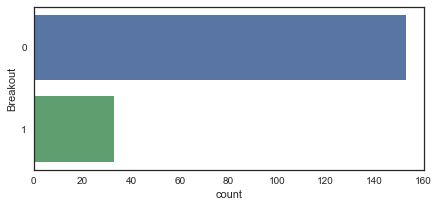

In [6]:
# Summary
targetBalance(rb_DF)

# Plot
plt.style.use('seaborn-white')
fig, axs = plt.subplots(1, 1, figsize=(7, 3))
sns.countplot(data=rb_DF, y='Breakout')
plt.show()

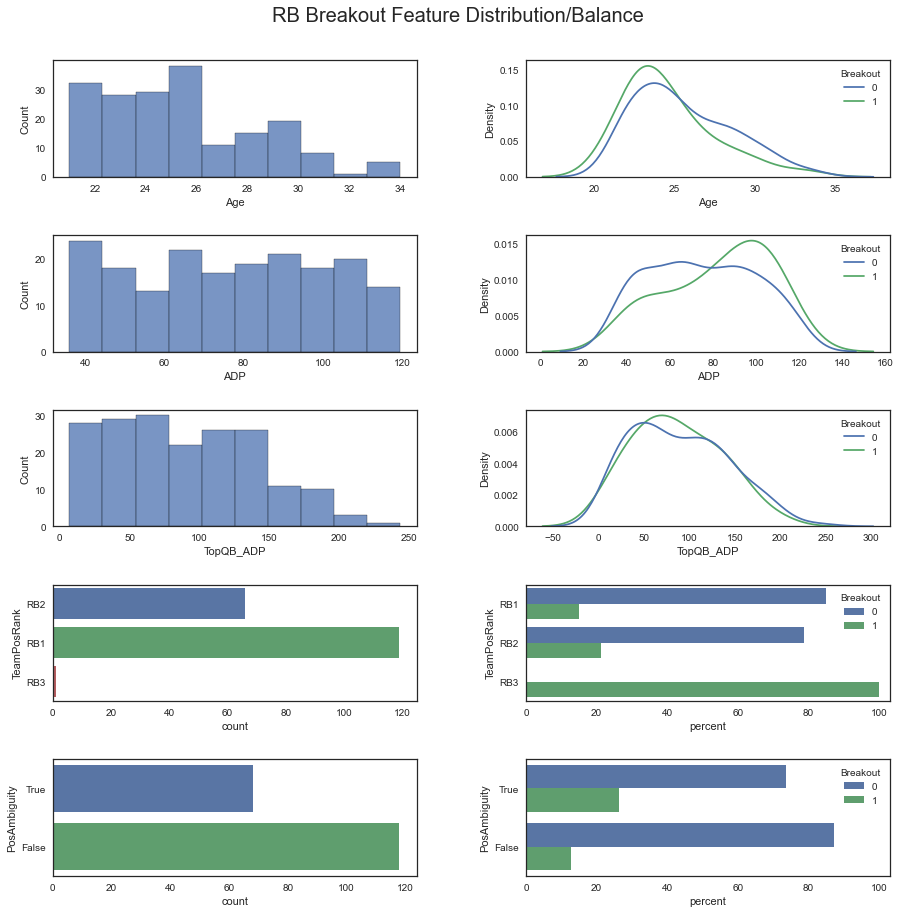

In [7]:
featurePlot(rb_DF, rb_or_wr='RB')

## WR Breakouts

Total Observations: 264
Breakout = 0: 223 observations
Breakout = 1: 41 observations
Fraction Breakouts: 0.155


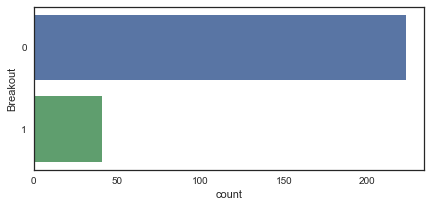

In [8]:
# Summary
targetBalance(wr_DF)

# Plot
plt.style.use('seaborn-white')
fig, axs = plt.subplots(1, 1, figsize=(7, 3))
sns.countplot(data=wr_DF, y='Breakout')
plt.show()

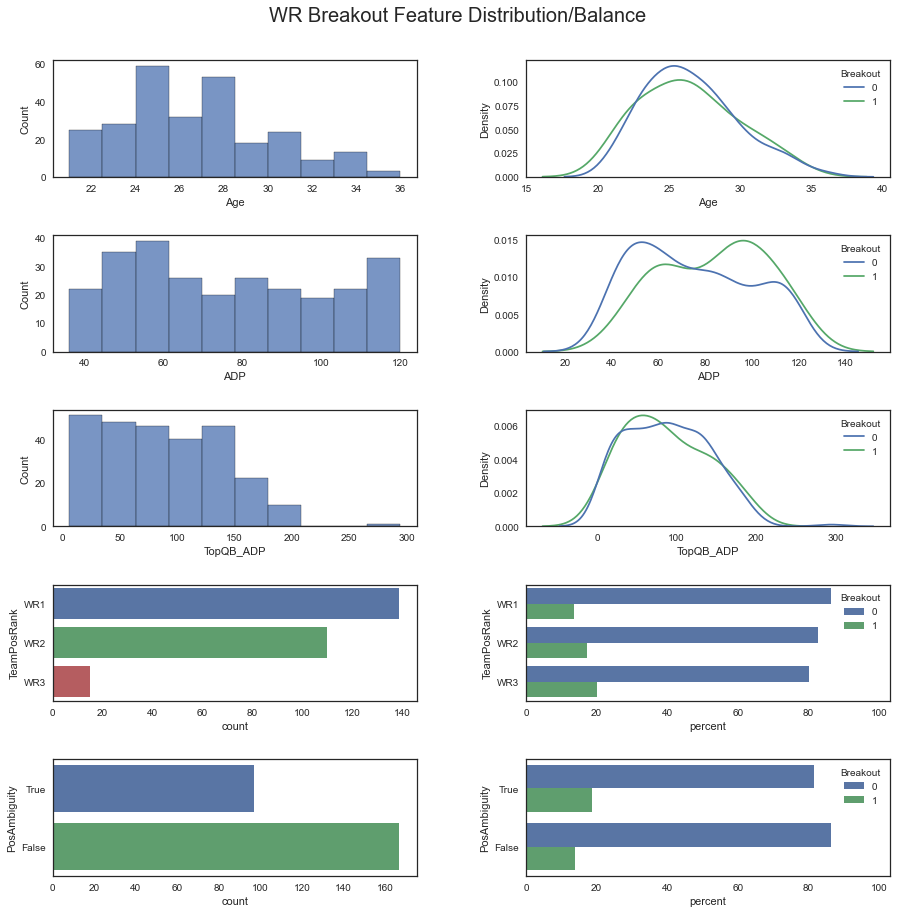

In [9]:
featurePlot(wr_DF, rb_or_wr='WR')